In [1]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import warnings

In [5]:
# Suppress warnings
warnings.filterwarnings('ignore')

In [7]:
#paths of data
path_train=r'C:\Users\Sarav\Imarticus Learning (Mega Sync)\Internships\Codtech IT Solutions\Computer Vision\xray_dataset_covid19\train'
path_test=r'C:\Users\Sarav\Imarticus Learning (Mega Sync)\Internships\Codtech IT Solutions\Computer Vision\xray_dataset_covid19\test'

In [9]:
# Get class names
name_classes = os.listdir(path_train)
print(f"Classes: {name_classes}")

Classes: ['COVID', 'NORMAL', 'PNEUMONIA']


In [11]:
# Function to visualize one image per class
def plot_sample_images(classes, data_path):
    plt.figure(figsize=(12, 6))
    for i, category in enumerate(classes):
        category_path = os.path.join(data_path, category)
        image_name = os.listdir(category_path)[0]
        image_path = os.path.join(category_path, image_name)
        
        img = image.load_img(image_path)
        img_array = image.img_to_array(img) / 255.0
        
        plt.subplot(1, len(classes), i + 1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

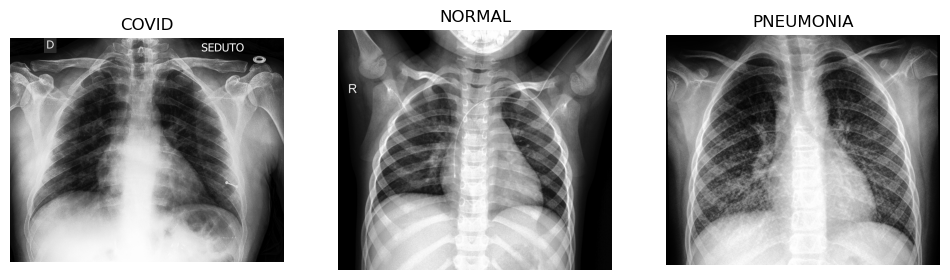

In [13]:
# Show sample images
plot_sample_images(name_classes, path_train)

In [15]:
#image preprocessing --> convert each photo to array from 0 to 1
#scale
data_generator = ImageDataGenerator(
    rescale=1/255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [17]:
# Train data generator
train_data = data_generator.flow_from_directory(
    path_train,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical'
)

Found 399 images belonging to 3 classes.


In [19]:
# Test data generator
test_data = data_generator.flow_from_directory(
    path_test,
    target_size=(224, 224),
    batch_size=1,
    class_mode='categorical'
)

Found 106 images belonging to 3 classes.


In [21]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(name_classes), activation='softmax')  # Output layer
])

In [23]:
#model summary 
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,955,331 (49.42 MB)

 Trainable params: 12,955,331 (49.42 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
#compile model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
             )

In [29]:
#fit model 
model_history = model.fit(train_data,
                         epochs = 50,
                         validation_data = test_data)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.3619 - loss: 1.4306 - val_accuracy: 0.5377 - val_loss: 1.0315
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.3969 - loss: 0.9902 - val_accuracy: 0.4811 - val_loss: 0.9257
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.5657 - loss: 0.8212 - val_accuracy: 0.5755 - val_loss: 0.8241
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5921 - loss: 0.7903 - val_accuracy: 0.6132 - val_loss: 0.8661
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6985 - loss: 0.6629 - val_accuracy: 0.6132 - val_loss: 0.8144
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.6862 - loss: 0.6740 - val_accuracy: 0.6415 - val_loss: 0.6328
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.6829 - loss: 0.6169 - val_accuracy: 0.7264 - val_loss: 0.6570
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7050 - loss: 0.6575 - val_accuracy: 0.7358 - val_loss:

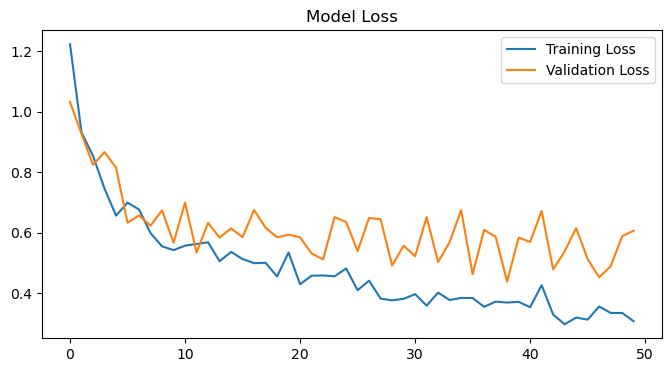

In [31]:
# Visualize training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

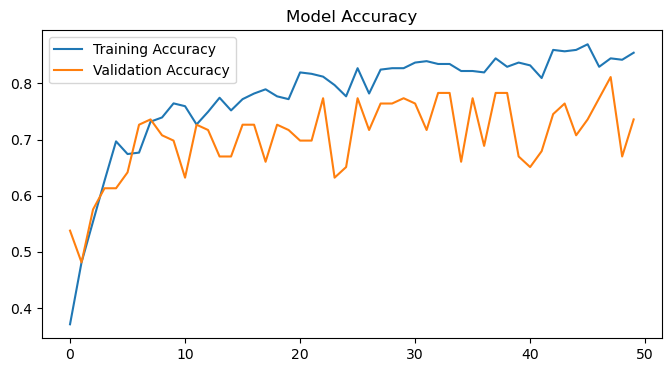

In [33]:
# Visualize training and validation accuracy
plt.figure(figsize=(8, 4))
plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

In [35]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.6683 - loss: 0.6459
Test Loss: 0.6003, Test Accuracy: 0.7453


In [37]:
# Get predictions and true labels
y_true = []
y_pred = []

In [43]:
# Reset the generator to iterate through all data
test_data.reset()
# Use next() to get batches of data
import numpy as np
for _ in range(len(test_data)):
    images, labels = next(test_data)  # Get the next batch of images and labels
    predictions = model.predict(images)
    y_true.append(np.argmax(labels, axis=1))  # Actual label
    y_pred.append(np.argmax(predictions, axis=1))  # Predicted label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

In [45]:
# Convert lists to arrays for further evaluation (e.g., confusion matrix)
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

In [59]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[12  0 14]
 [ 0 37  3]
 [11  4 25]]


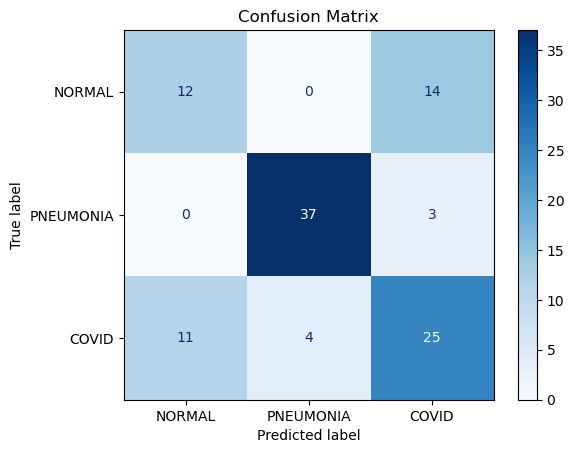

In [63]:
# Display confusion matrix with labels
name_classes = ['COVID', 'NORMAL', 'PNEUMONIA']  # Update with your class names
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=name_classes)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [65]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=name_classes))


Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.52      0.46      0.49        26
   PNEUMONIA       0.90      0.93      0.91        40
       COVID       0.60      0.62      0.61        40

    accuracy                           0.70       106
   macro avg       0.67      0.67      0.67       106
weighted avg       0.69      0.70      0.69       106



In [71]:
# Save the model
model.save('covid19_model.h5')

In [73]:
# Get class labels
class_map = {v: k for k, v in train_data.class_indices.items()}
print(f"Class Mapping: {class_map}")

Class Mapping: {0: 'COVID', 1: 'NORMAL', 2: 'PNEUMONIA'}


In [75]:
# Function to predict and visualize results
def make_prediction(image_path, actual_label):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_input = img_array.reshape(1, *img_array.shape)
    
    # Make prediction
    predicted_class = model.predict(img_input).argmax()
    predicted_label = class_map[predicted_class]
    
    # Display the image and prediction
    plt.figure(figsize=(5, 5))
    plt.imshow(img_array)
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

In [85]:
# Test the model on sample images
sample_images = [
    (r'C:\Users\Sarav\Imarticus Learning (Mega Sync)\Internships\Codtech IT Solutions\Computer Vision\xray_dataset_covid19\train\PNEUMONIA\08.jpeg', 'PNEUMONIA'),
    (r'C:\Users\Sarav\Imarticus Learning (Mega Sync)\Internships\Codtech IT Solutions\Computer Vision\xray_dataset_covid19\train\NORMAL\IM-0083-0001.jpeg', 'NORMAL'),
    (r'C:\Users\Sarav\Imarticus Learning (Mega Sync)\Internships\Codtech IT Solutions\Computer Vision\xray_dataset_covid19\train\COVID\055.jpeg', 'COVID')
]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


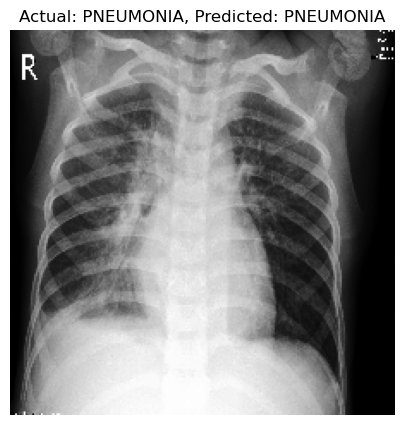

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


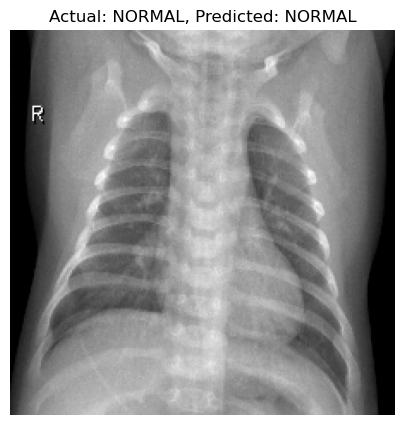

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


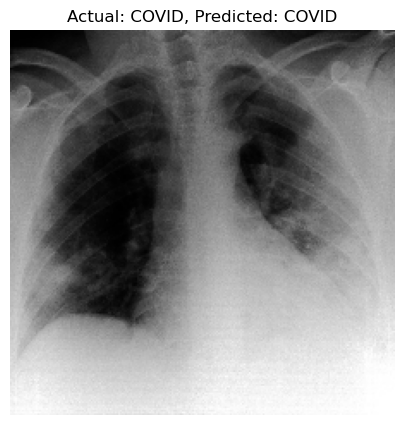

In [87]:
for img_path, label in sample_images:
    make_prediction(img_path, label)